<a href="https://colab.research.google.com/github/mayooueidat-uva/DS1002-S24/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [17]:
# List group members (if applicable). Identify names and computing IDs
# Member                          Computing ID
# Maya Uwaydat                    zvd6vz

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [18]:
# importing packages
import numpy as np
import pandas as pd

In [19]:
# importing the data
from google.colab import drive
drive.mount('/content/drive')
url = 'https://docs.google.com/spreadsheets/d/1w05CcsWnZSkfZR1vxW3dABjti6yRE_abyQ7_CIoelSc/export?format=csv'
ftx_data_messy = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [20]:
# i see 741 rows and 11 columns.
print(len(ftx_data_messy)) # rows
print(len(ftx_data_messy.columns)) # columns

741
11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [21]:
# how does the data even look?
ftx_data_messy

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,277156103.9,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,275958844.0,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,282925824.2,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,291430958.4,2022-12-28T23:59:59.999Z
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,303789780.7,2022-12-27T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
736,2021-01-06T00:00:00.000Z,2021-01-06T23:59:59.999Z,2021-01-06T23:59:03.000Z,2021-01-06T01:41:03.000Z,8.671285,9.390797,8.425946,9.390797,31404627.93,885993155.0,2021-01-06T23:59:59.999Z
737,2021-01-05T00:00:00.000Z,2021-01-05T23:59:59.999Z,2021-01-05T22:44:03.000Z,2021-01-05T06:19:03.000Z,7.528216,8.714947,7.081120,8.664688,49479278.39,817486925.3,2021-01-05T23:59:59.999Z
738,2021-01-04T00:00:00.000Z,2021-01-04T23:59:59.999Z,2021-01-04T06:40:03.000Z,2021-01-04T10:18:03.000Z,6.948680,7.632146,6.358218,7.514079,40526109.15,708930515.5,2021-01-04T23:59:59.999Z
739,2021-01-03T00:00:00.000Z,2021-01-03T23:59:59.999Z,2021-01-03T16:25:03.000Z,2021-01-03T00:25:03.000Z,6.201133,7.007523,6.171834,6.923968,31046652.87,653255343.6,2021-01-03T23:59:59.999Z


In [22]:
# checklist for what we need:
# - checking for duplicates
# - checking for NaNs
# - are all the integer columns filed with integers?
# - undoing messy formatting

In [23]:
# checking for duplicates
print(ftx_data_messy.duplicated().sum())

14


In [24]:
# dropping duplicates
ftx_data = ftx_data_messy.drop_duplicates()
print(len(ftx_data))

727


In [25]:
# checking for empty values
# https://saturncloud.io/blog/how-to-count-the-number-of-missingnan-values-in-each-row-in-python-pandas/
print(ftx_data.isna().sum())
# there are no missing values.

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64


In [26]:
# I WANT TO DOUBLE CHECK JUST IN CASE
print(len(ftx_data.dropna()))
# IT DIDN'T DROP ANY VALUES. THEREFORE THERE ARE NO MISSING VALUES
# YIPPEE

727


In [27]:
# okay, are all the integer columns filled with integers?
ftx_data.dtypes
# yeah they are. no need for cleaning there.

timeOpen      object
timeClose     object
timeHigh      object
timeLow       object
open         float64
high         float64
low          float64
close        float64
volume       float64
marketCap    float64
timestamp     object
dtype: object

In [28]:
# dropping the rows we were asked to drop
ftx_data = ftx_data.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], axis = 1)
ftx_data.head()

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z


In [29]:
# ordering data - i'm choosing to order by timestamp.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

# importing the 'datetime' package
import datetime as dt

# converting objects in 'timestamp' to 'datetime'
ftx_data['timestamp'] = pd.to_datetime(ftx_data['timestamp'],
                                        # attempt to infer format for each date
                                        infer_datetime_format = True,
                                        # return NA for rows where conversion failed
                                        errors = 'coerce')
# sort by date and time
ftx_data = ftx_data.sort_values(by="timestamp", axis=0, ascending=True)

In [30]:
# the timestamp column is also ugly as sin, so i'm wondering if i should
# clean it?
# https://saturncloud.io/blog/how-to-remove-time-from-datetime-variable-in-pandas/
ftx_data['timestamp'] = ftx_data['timestamp'].dt.strftime('%d-%m-%Y')

In [31]:
# what data do we have now?
ftx_data.head()

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,31046652.87,03-01-2021
738,6.948680,7.632146,6.358218,7.514079,40526109.15,04-01-2021
737,7.528216,8.714947,7.081120,8.664688,49479278.39,05-01-2021
736,8.671285,9.390797,8.425946,9.390797,31404627.93,06-01-2021
735,9.386493,10.004872,9.215244,9.562131,46303336.73,07-01-2021


In [42]:
# getting our columns in order because the present chart...
# ...is actually horribly difficult to read
# https://www.geeksforgeeks.org/change-the-order-of-a-pandas-dataframe-columns-in-python/
ftx_data = ftx_data.iloc[:,[5, 0, 1, 2, 3, 4]]

Now display the first 10 rows of the cleaned dataset.

In [33]:
ftx_data.head(10)

,timestamp,open,high,low,close,volume
739,03-01-2021,6.201133,7.007523,6.171834,6.923968,3.104665e+07
738,04-01-2021,6.948680,7.632146,6.358218,7.514079,4.052611e+07
737,05-01-2021,7.528216,8.714947,7.081120,8.664688,4.947928e+07
736,06-01-2021,8.671285,9.390797,8.425946,9.390797,3.140463e+07
735,07-01-2021,9.386493,10.004872,9.215244,9.562131,4.630334e+07
734,08-01-2021,9.569239,9.726429,8.452265,9.380988,4.228627e+07
733,09-01-2021,9.370450,9.636120,8.728044,9.570511,2.849895e+07
732,10-01-2021,9.571917,9.944797,8.657147,9.308809,3.101239e+07
731,11-01-2021,9.298315,9.298315,7.126050,8.610997,1.013024e+08
730,12-01-2021,8.615143,9.097479,8.040916,8.381133,2.674536e+07


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [34]:
ftx_data["close_change"] = ftx_data['close'].diff()
ftx_data = ftx_data.iloc[:,[0, 1, 2, 3, 4, 6, 5]]
ftx_data

,timestamp,open,high,low,close,close_change,volume
739,03-01-2021,6.201133,7.007523,6.171834,6.923968,NaN,31046652.87
738,04-01-2021,6.948680,7.632146,6.358218,7.514079,0.590111,40526109.15
737,05-01-2021,7.528216,8.714947,7.081120,8.664688,1.150608,49479278.39
736,06-01-2021,8.671285,9.390797,8.425946,9.390797,0.726110,31404627.93
735,07-01-2021,9.386493,10.004872,9.215244,9.562131,0.171334,46303336.73
...,...,...,...,...,...,...,...
4,27-12-2022,0.931138,0.955402,0.916414,0.923668,-0.007028,4574953.05
3,28-12-2022,0.921162,0.925702,0.869842,0.886091,-0.037577,4192949.85
2,29-12-2022,0.885723,0.887118,0.843029,0.860231,-0.025860,3766979.57
1,30-12-2022,0.860193,0.864752,0.826643,0.839048,-0.021183,3608615.07


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [35]:
# how do i find the 'top 10'? i need to sort them
ftx_growth = ftx_data.sort_values(["close_change"], ascending=False)
ftx_growth.head(10)

,timestamp,open,high,low,close,close_change,volume
492,01-09-2021,48.511426,65.970515,47.177669,65.181877,16.677156,1.743544e+09
487,06-09-2021,63.527662,77.351114,62.268965,73.347876,9.800320,2.040937e+09
692,19-02-2021,26.254523,34.601007,26.254523,34.577106,8.335900,2.767550e+08
592,24-05-2021,27.003012,33.723822,27.003012,33.404150,6.333923,1.677276e+08
673,09-03-2021,32.013785,37.566227,31.849448,37.532879,5.529699,1.513847e+08
515,09-08-2021,43.588232,49.457371,41.870726,48.892233,5.325192,1.948272e+08
485,08-09-2021,70.990536,78.626754,61.990467,76.188545,5.239728,2.855900e+09
625,26-04-2021,46.423056,51.315860,46.273925,50.871603,4.504385,1.430288e+08
611,05-05-2021,53.798787,58.515094,53.450072,58.496713,4.488174,1.256225e+08
311,28-02-2022,41.569745,46.361925,41.245399,45.972602,4.401841,1.709422e+08


In [36]:
# (is it asking us to isolate dates and close changes? i think it is)
ftx_top_justclosechange = ftx_growth.drop(["open", "high", "low", "close", "volume"], axis = 1)
ftx_top_justclosechange.head(10)
# maya you still gotta isolate the dates
# also how is datetime SUPPOSED to look??

,timestamp,close_change
492,01-09-2021,16.677156
487,06-09-2021,9.800320
692,19-02-2021,8.335900
592,24-05-2021,6.333923
673,09-03-2021,5.529699
515,09-08-2021,5.325192
485,08-09-2021,5.239728
625,26-04-2021,4.504385
611,05-05-2021,4.488174
311,28-02-2022,4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [37]:
ftx_data["rate_of_change"] = ftx_data['close_change'].pct_change()
ftx_data = ftx_data.iloc[:,[0, 1, 2, 3, 4, 5, 7, 6]]
ftx_data
# did ya do this right? like, are the percentages that are being calculated correct?

<ipython-input-37-6551fc00c2e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftx_data["rate_of_change"] = ftx_data['close_change'].pct_change()


,timestamp,open,high,low,close,close_change,rate_of_change,volume
739,03-01-2021,6.201133,7.007523,6.171834,6.923968,NaN,NaN,31046652.87
738,04-01-2021,6.948680,7.632146,6.358218,7.514079,0.590111,NaN,40526109.15
737,05-01-2021,7.528216,8.714947,7.081120,8.664688,1.150608,0.949817,49479278.39
736,06-01-2021,8.671285,9.390797,8.425946,9.390797,0.726110,-0.368934,31404627.93
735,07-01-2021,9.386493,10.004872,9.215244,9.562131,0.171334,-0.764039,46303336.73
...,...,...,...,...,...,...,...,...
4,27-12-2022,0.931138,0.955402,0.916414,0.923668,-0.007028,-1.195015,4574953.05
3,28-12-2022,0.921162,0.925702,0.869842,0.886091,-0.037577,4.346593,4192949.85
2,29-12-2022,0.885723,0.887118,0.843029,0.860231,-0.025860,-0.311817,3766979.57
1,30-12-2022,0.860193,0.864752,0.826643,0.839048,-0.021183,-0.180850,3608615.07


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [38]:
# positive
ftx_positive_change = ftx_data.sort_values(["rate_of_change"], ascending=False)
ftx_positive_change = ftx_positive_change.drop(["open", "high", "low", "close", "volume", "close_change"], axis = 1)
ftx_positive_change.head(5)
# again, do i isolate the dates from the times???

,timestamp,rate_of_change
372,28-12-2021,612.327326
55,08-11-2022,129.835559
236,13-05-2022,117.908927
308,03-03-2022,92.537611
513,11-08-2021,65.569141


In [39]:
# negative
ftx_negative_change = ftx_data.sort_values(["rate_of_change"], ascending=True)
ftx_negative_change = ftx_negative_change.drop(["open", "high", "low", "close", "volume", "close_change"], axis = 1)
ftx_negative_change.head(5)

,timestamp,rate_of_change
443,18-10-2021,-262.744824
190,28-06-2022,-164.238214
107,17-09-2022,-111.945109
132,23-08-2022,-84.342985
179,09-07-2022,-50.514721


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

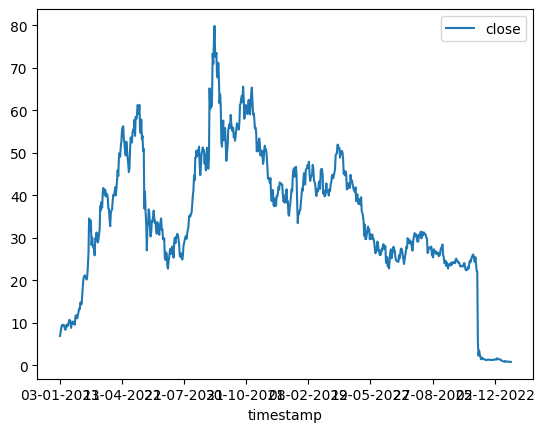

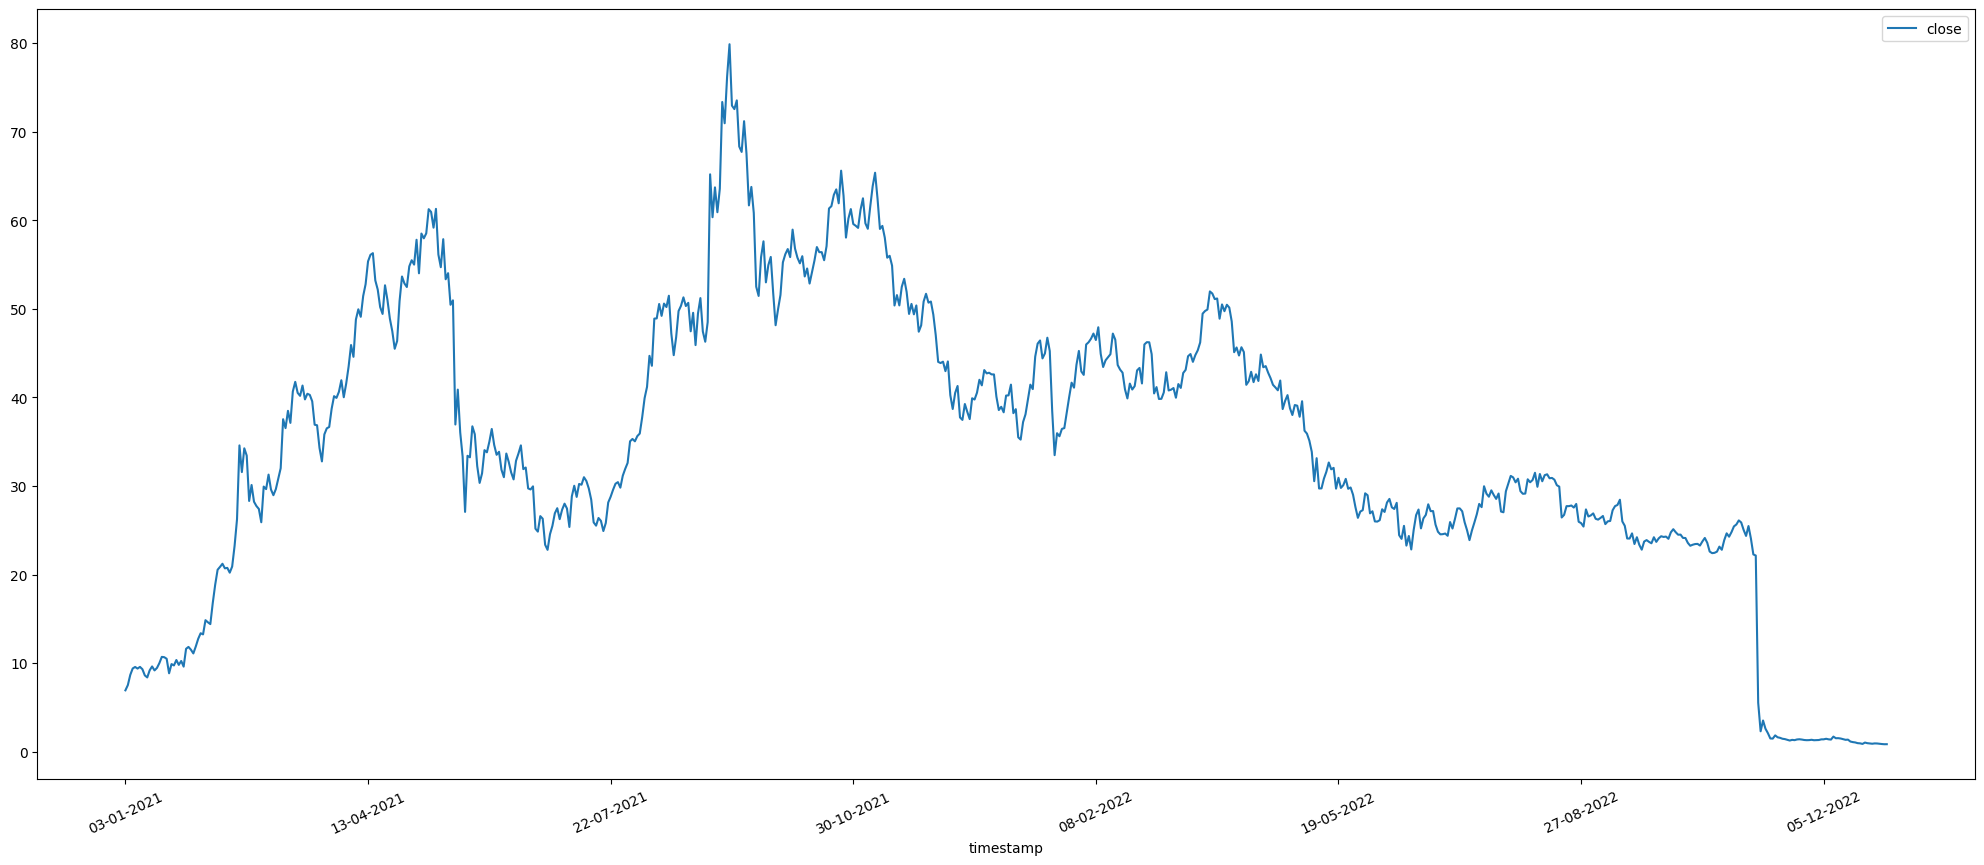

In [88]:
# i very badly want to do a line plot.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
# https://stackoverflow.com/questions/62942551/stretch-out-portion-of-x-axis-on-pandas-dataframe-plot-plotting-uneven-x-axis
# line plot for closing price
# the bottom chart should be the right one.
ftx_data.plot.line(x="timestamp", y="close")
ax = ftx_data.interpolate().plot(x='timestamp', y='close', figsize=(25, 10), rot=25)

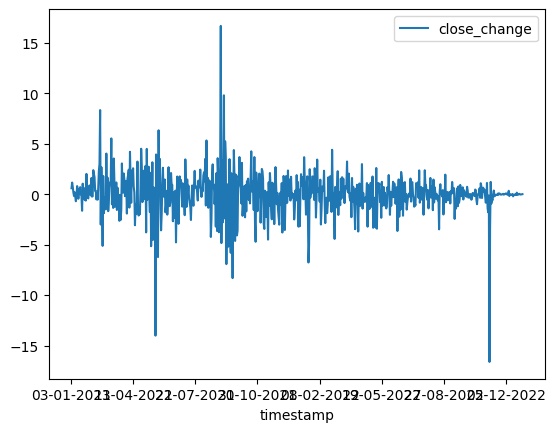

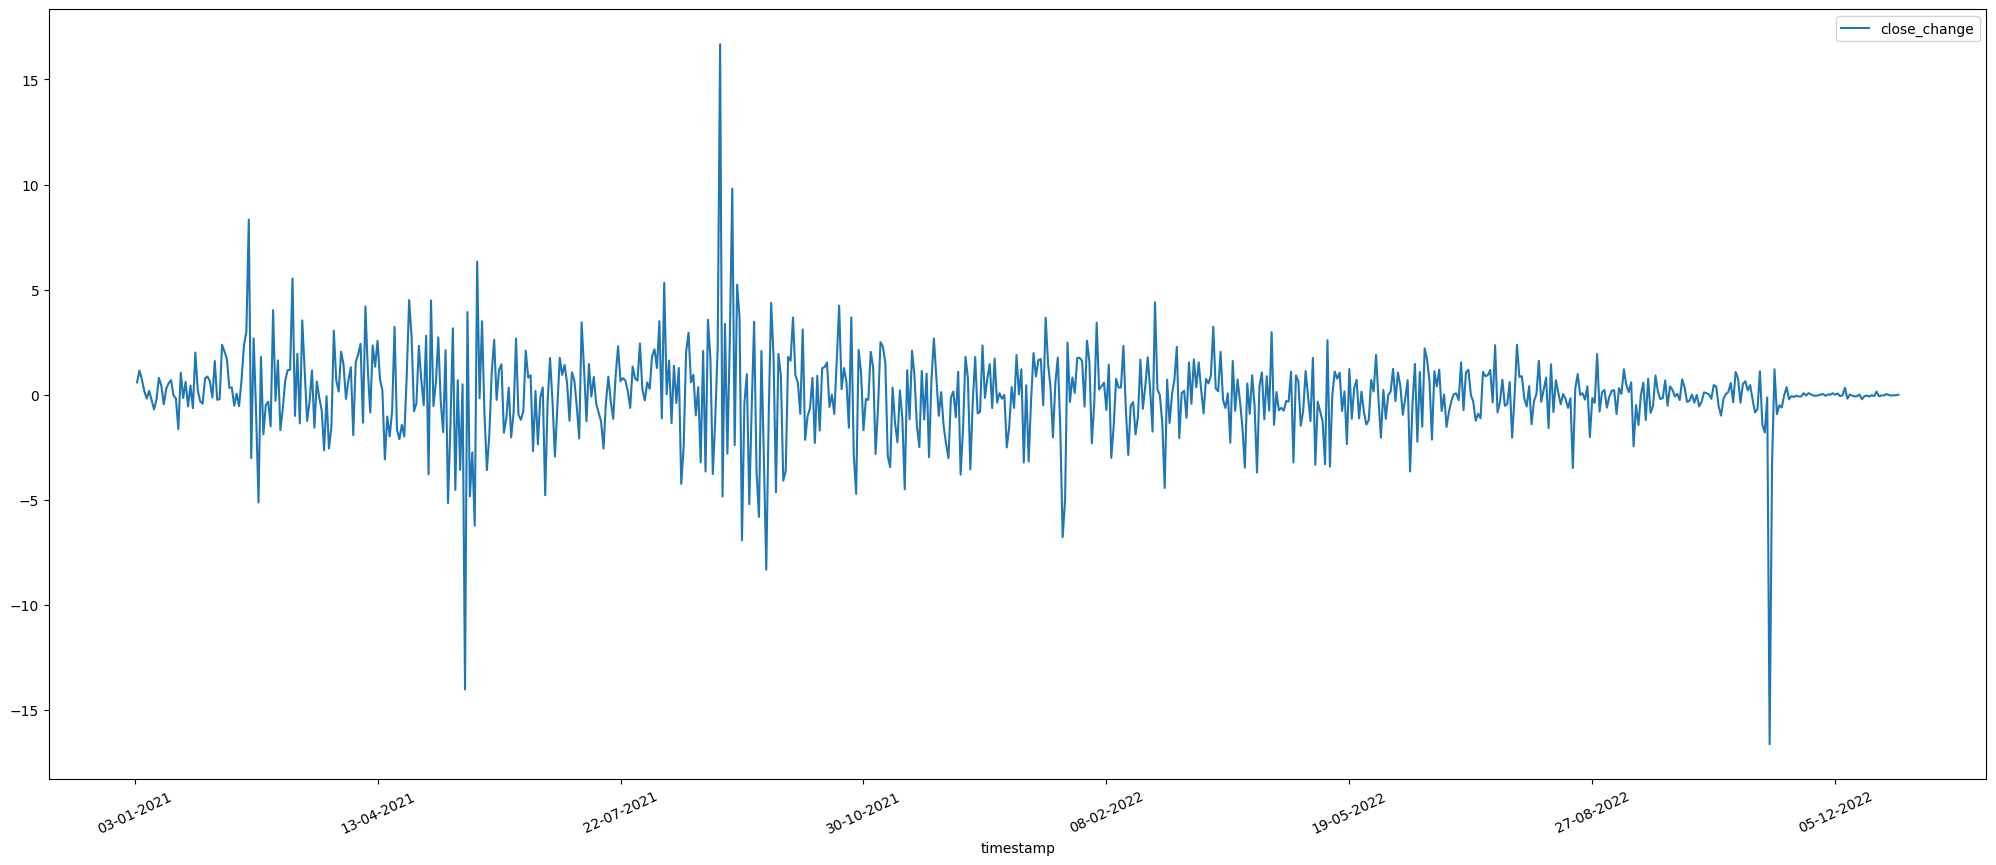

In [75]:
# line plot for change in closing price over time
ftx_data.plot.line(x="timestamp", y="close_change")
ax = ftx_data.interpolate().plot(x='timestamp', y='close_change', figsize=(25, 10), rot=25)
ax =
# the bottom chart should be the right one.

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

In [89]:
ftx_data_chart = ftx_data.drop(["open", "high", "low"], axis = 1)

<Axes: >

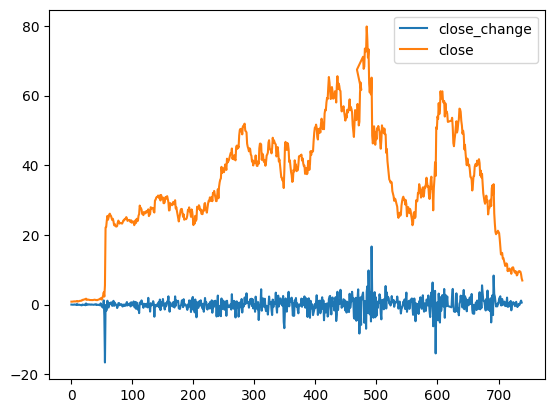

In [94]:
ftx_data_chart.plot()